# **<font color='white gray'>@panData</font>**
# **<font color='white gray'>Data Analysis Projects with Python Language</font>**
# **<font color='white gray'>Data Visualization Techniques</font>**


## **Python Packages Used in the Project**

In [1]:
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


In [2]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 2. Ignore warnings for clean output
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "panData"

Author: panData



## **Loading the Data**

> We are importing the dataset generated at the end of the last project.

In [4]:
# 3. Loading the data
data = pd.read_csv("project_result.csv")


In [5]:
# 4. Viewing the data
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergency,Home,Emergency_Room,3,59,...,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergency,Home,Emergency_Room,2,11,...,2,0,1,6,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,2,44,...,0,0,0,7,1,1,0,1,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,1,51,...,0,0,0,5,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Other,Home,Other,3,31,...,0,0,0,9,0,1,1,3,0,1


In [6]:
# 5. Shape
data.shape

(68629, 22)

In [7]:
# 6. Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

#### **1- Total Medications Consumed by Age Group**

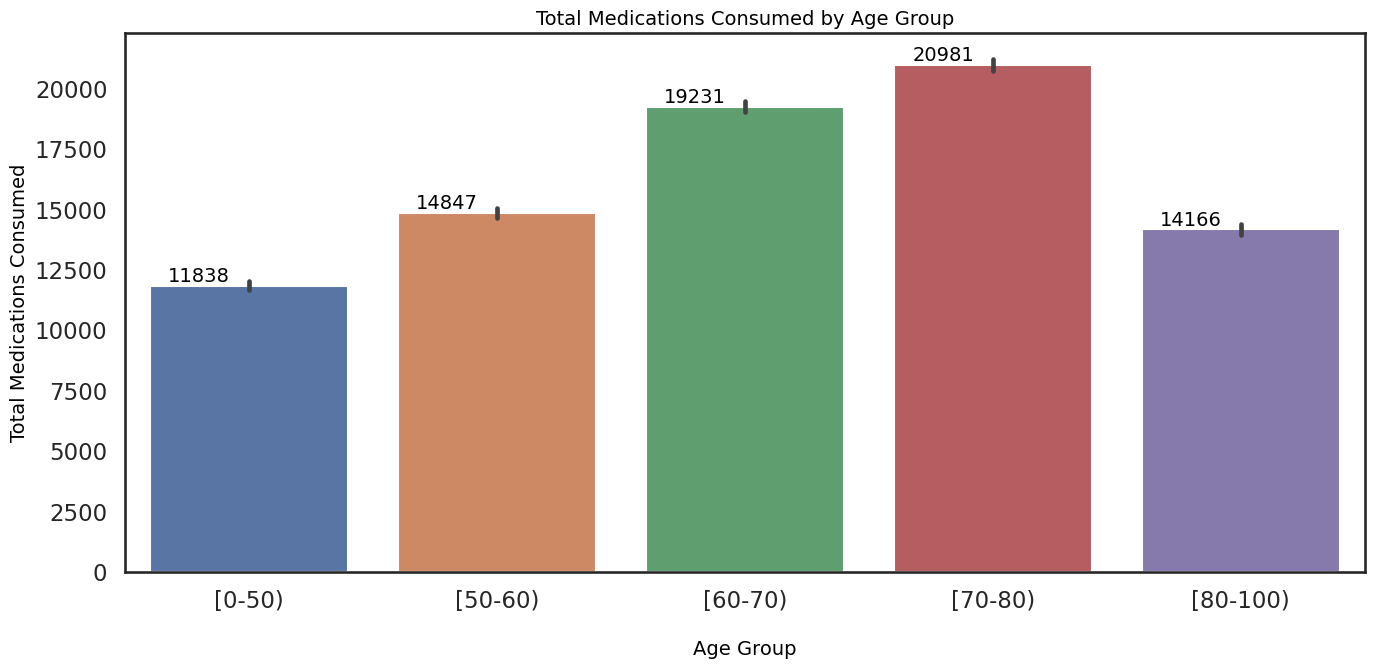

In [35]:
# 7. Colored Bar Chart with Custom Palette

# Figure size
plt.figure(figsize=(16, 7))

# Creating the bar chart with a custom color palette
custom_palette = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3']
figx = sns.barplot(x='age', y='num_med', estimator=np.sum, data=data, palette=custom_palette)

# x-axis label
plt.xlabel("\nAge Group", fontsize=14, color='black')

# y-axis label
plt.ylabel("Total Medications Consumed", fontsize=14, color='black')

# Title
plt.title("Total Medications Consumed by Age Group", fontsize=14, color='black')

# Adding total values as labels on each bar
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha='center',
                  va='bottom',
                  fontsize=14,
                  color='black')

# Displaying the chart
plt.show()


> The age group of patients between 70-80 consumes the most medications.

#### **2- Total of Readmissions of Diabetic Patients by Gender**

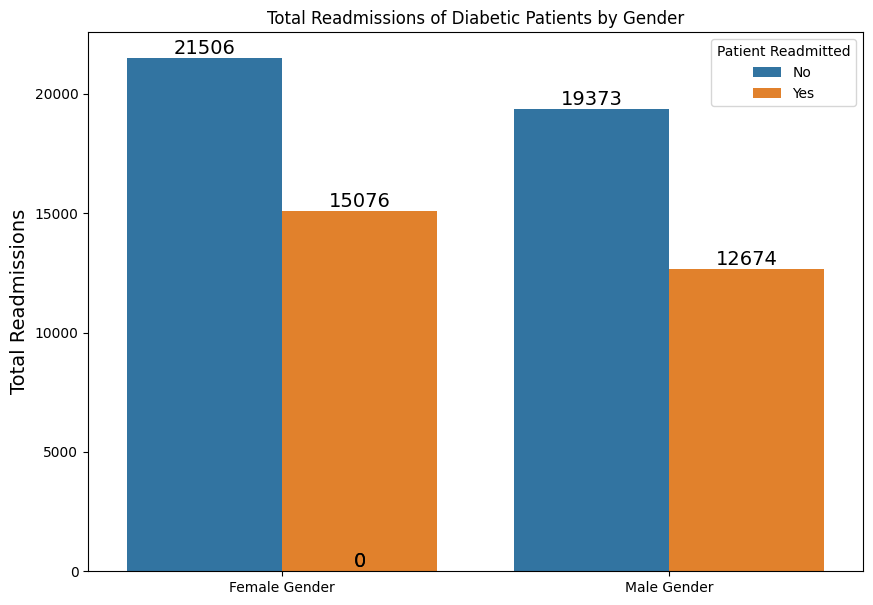

In [9]:
# 8. Count Plot (Bar Chart for Categorical Variables)

# Creating the bar chart with label encoding
figx = sns.countplot(x = [('Female Gender' if x == 0 else 'Male Gender') for x in data['gender']],
                     hue = 'readmitted',
                     data = data)

# Figure size in inches
figx.figure.set_size_inches(10,7)

# Legend
figx.legend(title = 'Patient Readmitted', labels = ('No', 'Yes'))

# y-axis label
plt.ylabel("Total Readmissions", fontsize = 14, color = 'black')

# Title
figx.axes.set_title('Total Readmissions of Diabetic Patients by Gender')

# Adding total values as labels on each bar
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

# Displaying the chart
plt.show()


> Female patients have a higher number of readmissions.

#### **3- Total Readmissions of Patients by Age Group**

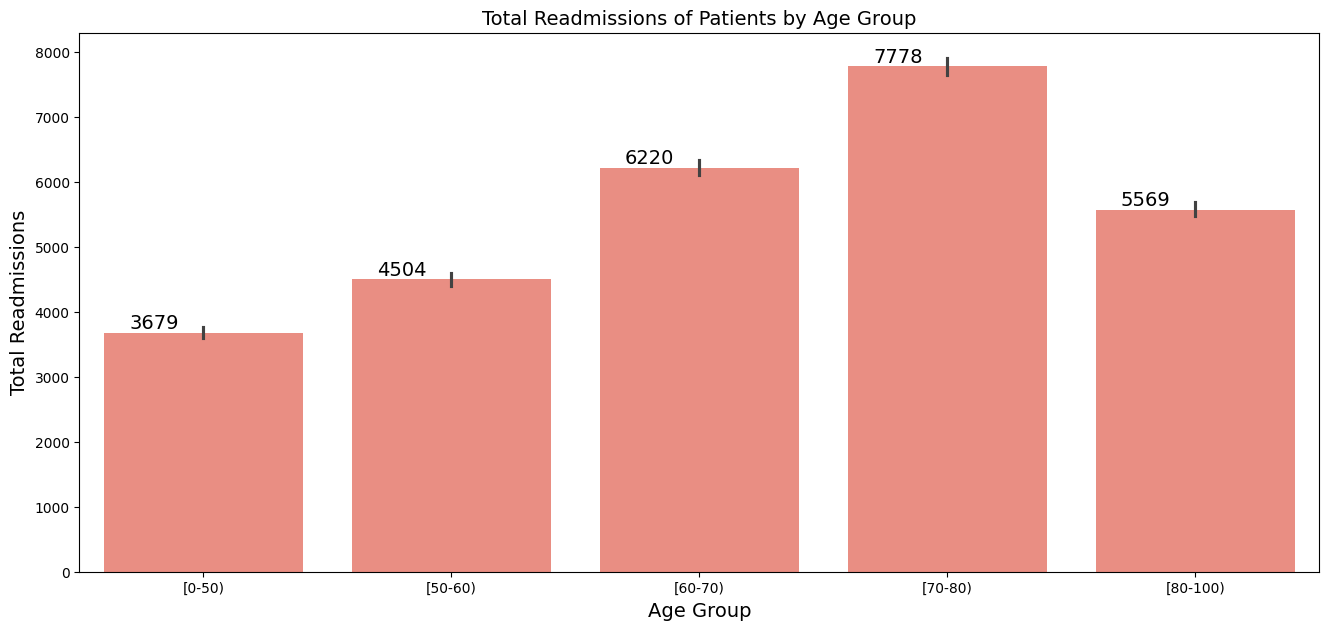

In [10]:
# 9. Single-Color Bar Chart

# Figure size
plt.figure(figsize = (16,7))

# Creating the bar chart
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = data, color = 'salmon')

# x-axis label
plt.xlabel("Age Group", fontsize = 14, color = 'black')

# y-axis label
plt.ylabel("Total Readmissions", fontsize = 14, color = 'black')

# Title
plt.title("Total Readmissions of Patients by Age Group", fontsize = 14, color = 'black')

# Adding total values as labels on each bar
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom',
                  fontsize = 14,
                  color = 'black')

# Displaying the chart
plt.show()


> The age group of patients between 70-80 has the highest number of readmissions.

#### **4- Percentage of Readmissions/Non-Readmissions of Patients by Age Group**

In [11]:
# 10. First, we calculate the percentages
age_readmission_percentage = pd.crosstab(data.age, data.readmitted, margins=True, normalize='index') * 100
age_readmission_percentage

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


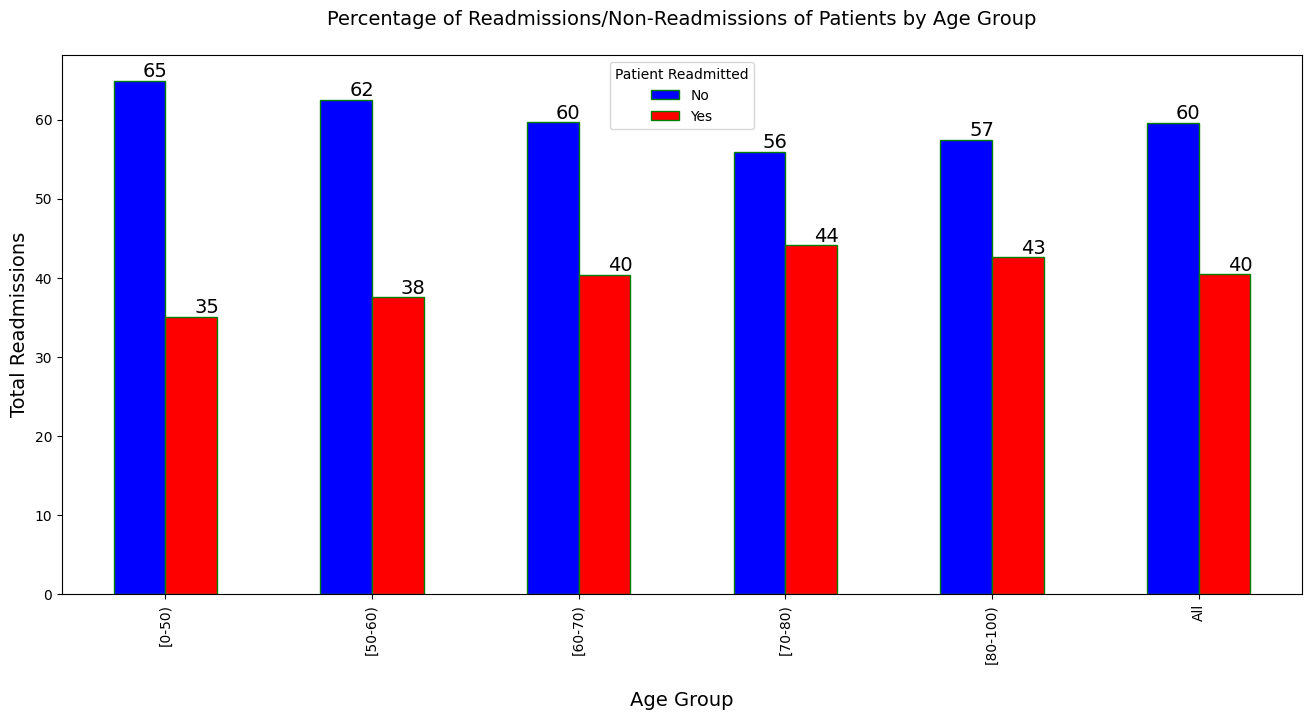

In [12]:
# 11. Pandas Bar Chart

# Note that we call the plot from the DataFrame using Matplotlib in this case
fig = age_readmission_percentage.plot(kind='bar',
                                      figsize=(16, 7),
                                      width=0.5,
                                      edgecolor='g',
                                      color=['b', 'r'])

# Legend
plt.legend(title='Patient Readmitted', labels=('No', 'Yes'))

# x-axis label
plt.xlabel("\nAge Group", fontsize=14, color='black')

# y-axis label
plt.ylabel("Total Readmissions", fontsize=14, color='black')

# Title
plt.title("Percentage of Readmissions/Non-Readmissions of Patients by Age Group\n", fontsize=14)

# Adding total values as labels on each bar
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha='center',
                 va='bottom',
                 fontsize=14,
                 color='black')

# Displaying the chart
plt.show()


> The age group of patients between 70-80 has the highest percentage of readmissions, while the age group of 0-50 years has the lowest percentage.


#### **5- Total Readmissions of Patients by Gender, Age, and Admission Type**


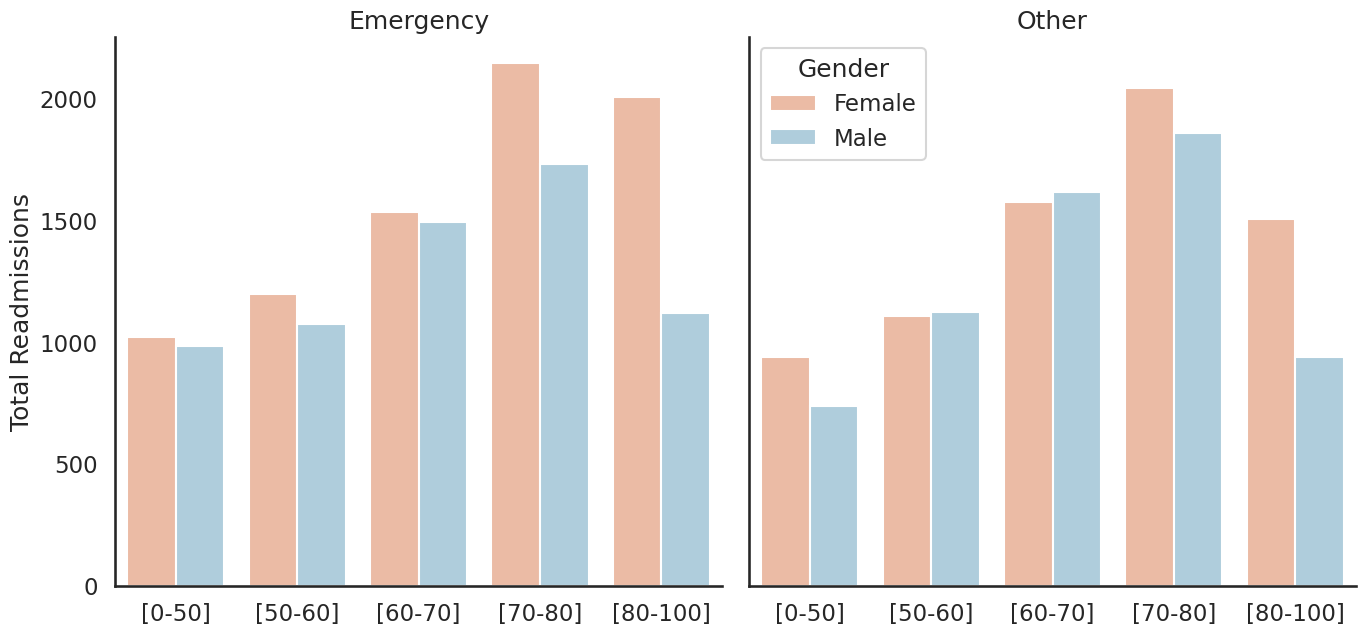

In [13]:
# 12. Catplot (Category Plot with Bar Chart)

# Setting background
sns.set(style="white", context="talk")

# Creating the bar chart with catplot
# https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
g = sns.catplot(x='age',
                y='readmitted',
                hue='gender',
                col='admission_type_id',
                estimator=np.sum,
                data=data,
                palette="RdBu",
                kind="bar",
                height=7,
                aspect=1,
                legend=False,
                ci=None)

# Labels
(g.set_axis_labels("", "Total Readmissions")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legend
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])

# Displaying the chart
plt.show(g)


> Women in the 70-80 age group have a higher number of emergency readmissions.

#### **6- Total Readmissions/Non-Readmissions by Gender and Race**

In [14]:
# 13. Create a temporary DataFrame to adjust the target variable label for plotting
df_temp = data

In [15]:
# 14. Map 0 and 1 to labels
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Not Readmitted", 1: "Readmitted"})

In [16]:
# 15. First rows of the temporary DataFrame
df_temp.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidity,num_med_dosage_changes,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergency,Home,Emergency_Room,3,59,...,0,0,0,9,1,1,Readmitted,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergency,Home,Emergency_Room,2,11,...,2,0,1,6,0,1,Not Readmitted,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,2,44,...,0,0,0,7,1,1,Not Readmitted,1,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergency,Home,Emergency_Room,1,51,...,0,0,0,5,1,1,Not Readmitted,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Other,Home,Other,3,31,...,0,0,0,9,0,1,Readmitted,3,0,1


<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

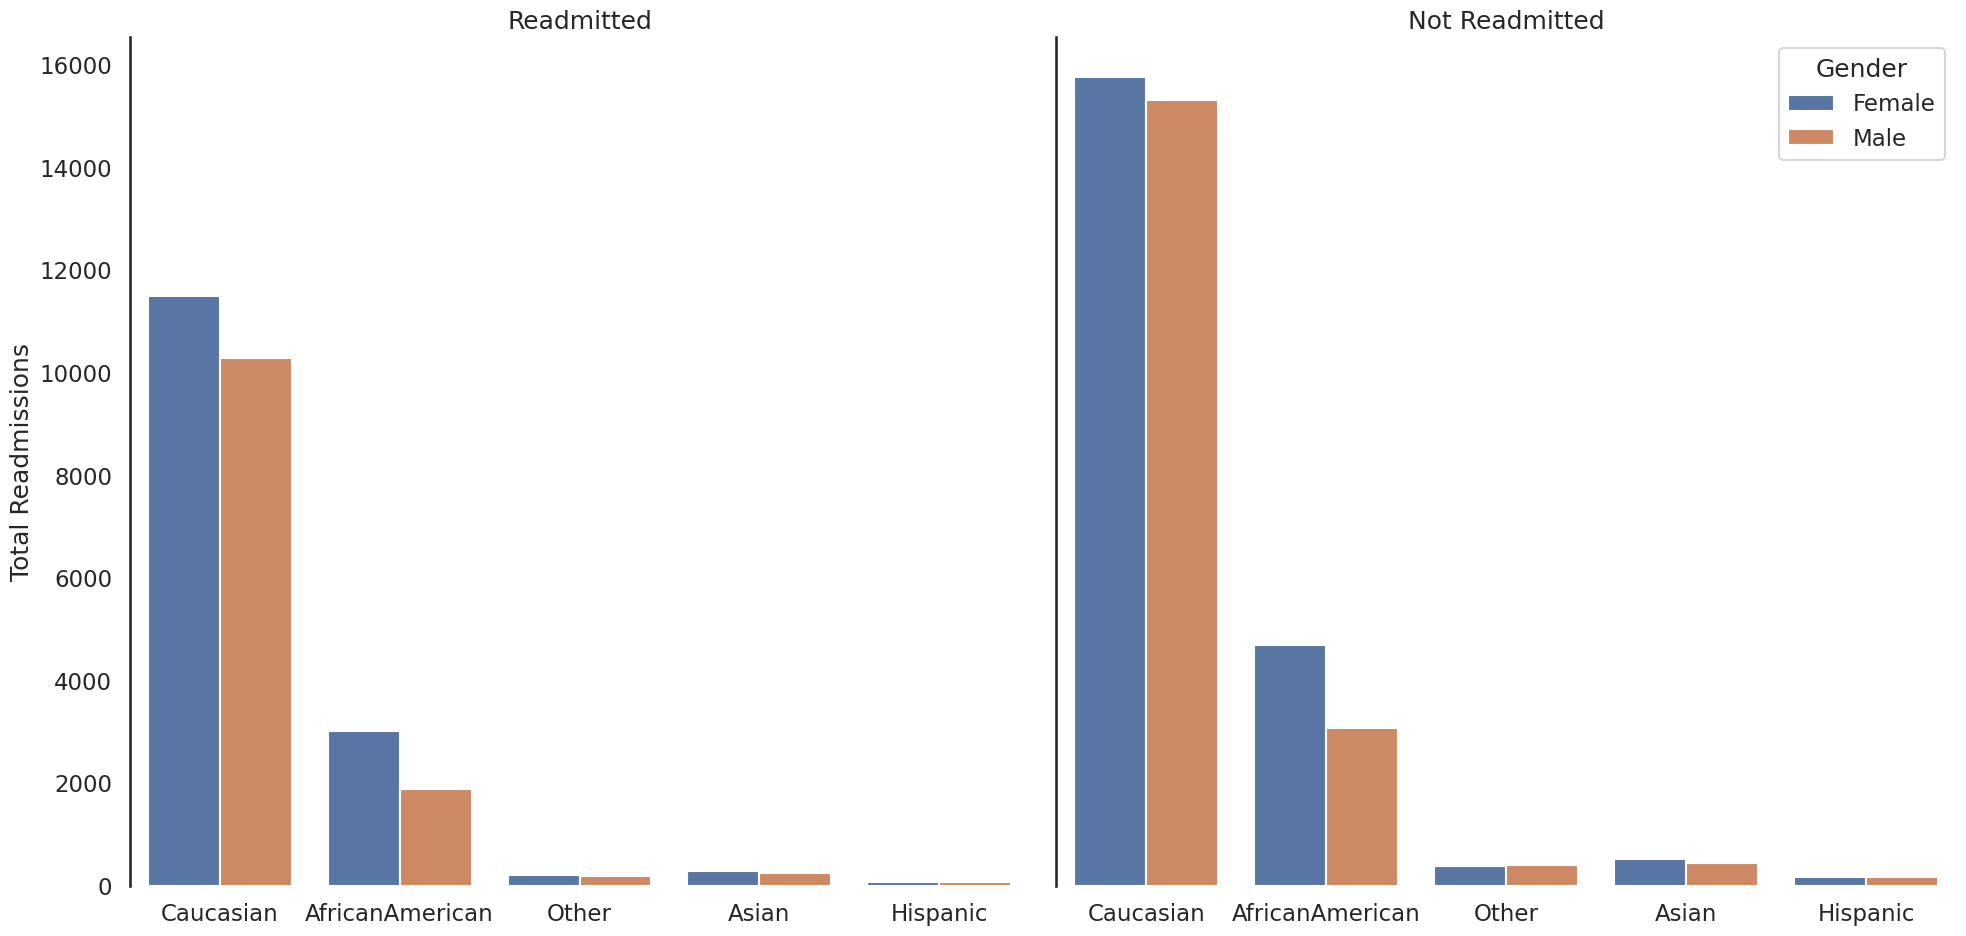

In [17]:
# 16. Facet Grid

# Removing the background
sns.set(style="white", context="talk")

# Create a function for countplot
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs)

# Create a facet grid (using the temporary DataFrame)
grid = sns.FacetGrid(data=df_temp, col='readmitted', height=10, aspect=1)

# Mapping the facet grid to variables
fig = grid.map(countplot, 'race', 'gender', palette='deep')

# Labels
(fig.set_axis_labels("", "Total Readmissions")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

# Legend
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

# Remove chart borders
sns.despine(bottom=True)

> Caucasian women are the majority among readmitted women.

https://pt.wikipedia.org/wiki/Ra%C3%A7a_caucasiana



#### **7- Number of Visits x Comorbidity**

In [18]:
# 17. Create the contingency table
num_visits_comorbidity = pd.crosstab(data.number_inpatient, data.comorbidity).sum()
num_visits_comorbidity

,0
comorbidity,
0,15295
1,19591
2,27264
3,6479


In [19]:
# 18. Type
type(num_visits_comorbidity)

pandas.core.series.Series

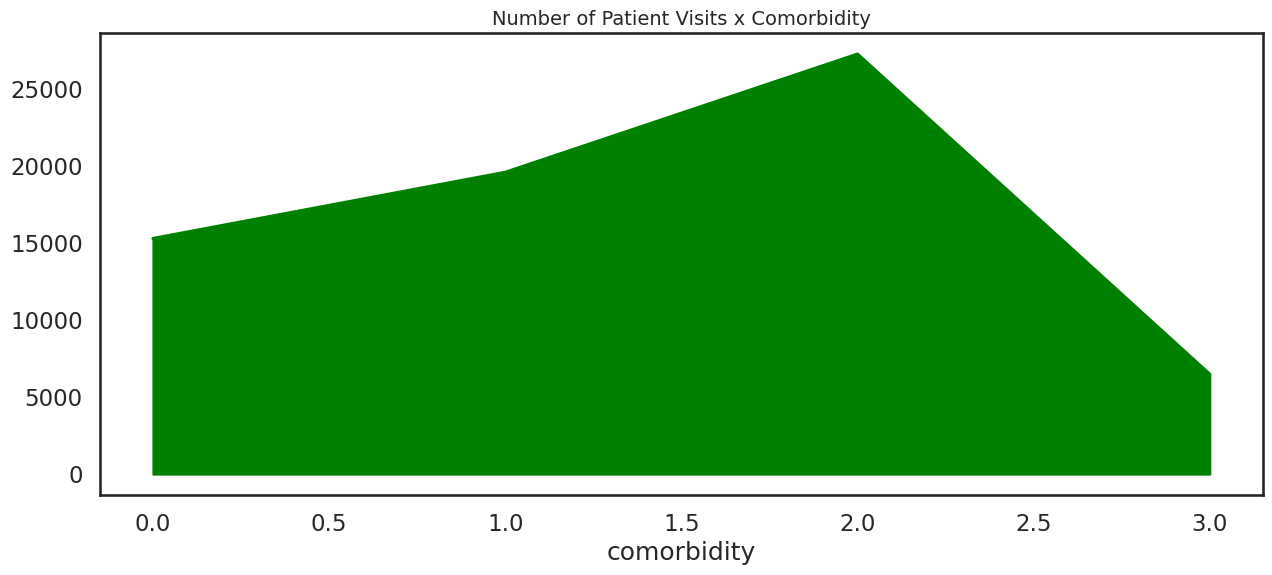

In [20]:
# 19. Area Chart (avoid using this!)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html
fig = num_visits_comorbidity.plot(kind='area',
                                  figsize=(15,6),
                                  color='Green')

# Adding total values as labels on each bar
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha='center',
                 va='bottom',
                 fontsize=14,
                 color='black')

# Title
plt.title("Number of Patient Visits x Comorbidity", fontsize=14)
plt.show()

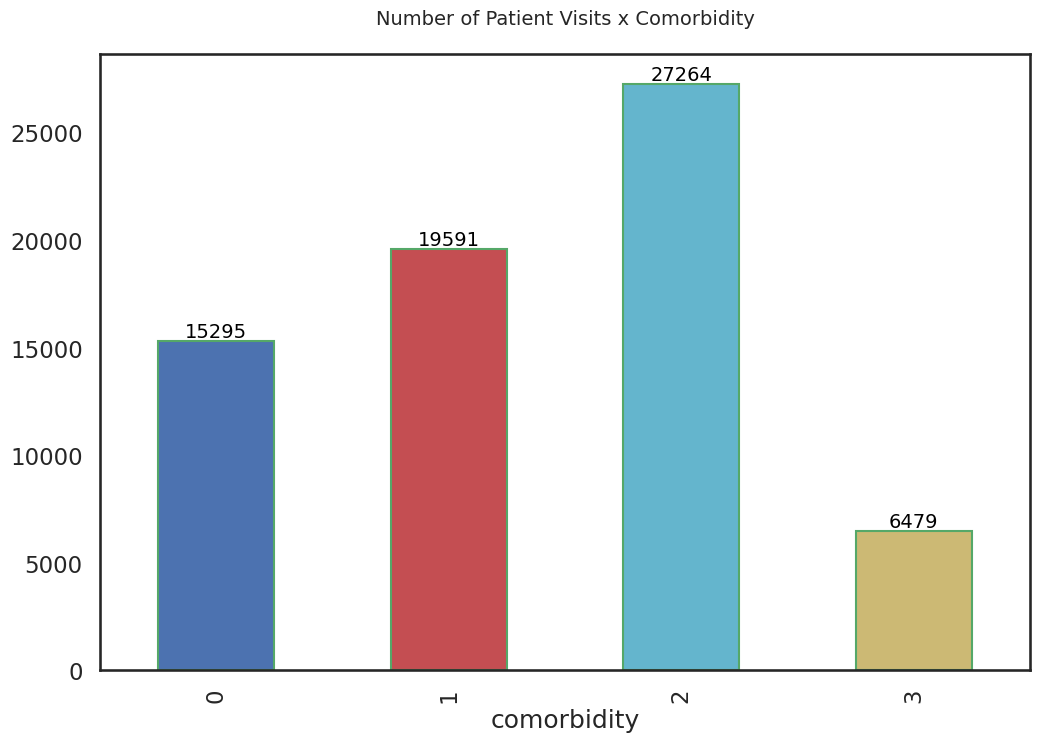

In [21]:
# 20. Bar Chart (always a safer option)

# Remove background lines
sns.set(style="white", context="talk")

# Create the bar chart
fig = num_visits_comorbidity.plot(kind='bar',
                                  figsize=(12,8),
                                  width=0.5,
                                  edgecolor='g',
                                  color=['b','r','c','y'],
                                  rot=90)

# Adding total values as labels on each bar
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.25, p.get_height()),
                 ha='center',
                 va='bottom',
                 fontsize=14,
                 color='black')

# Title
plt.title("Number of Patient Visits x Comorbidity\n", fontsize=14)

# Displaying the chart
plt.show()

>Patients with comorbidities have the highest number of visits (medical consultations).

#### **8- Proportion of Readmissions by Number of Visits Before Discharge**

In [22]:
# 21. Contingency table
percent_visits_readm = pd.crosstab(data.number_inpatient, data.readmitted, normalize='index') * 100
percent_visits_readm

readmitted,Not Readmitted,Readmitted
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


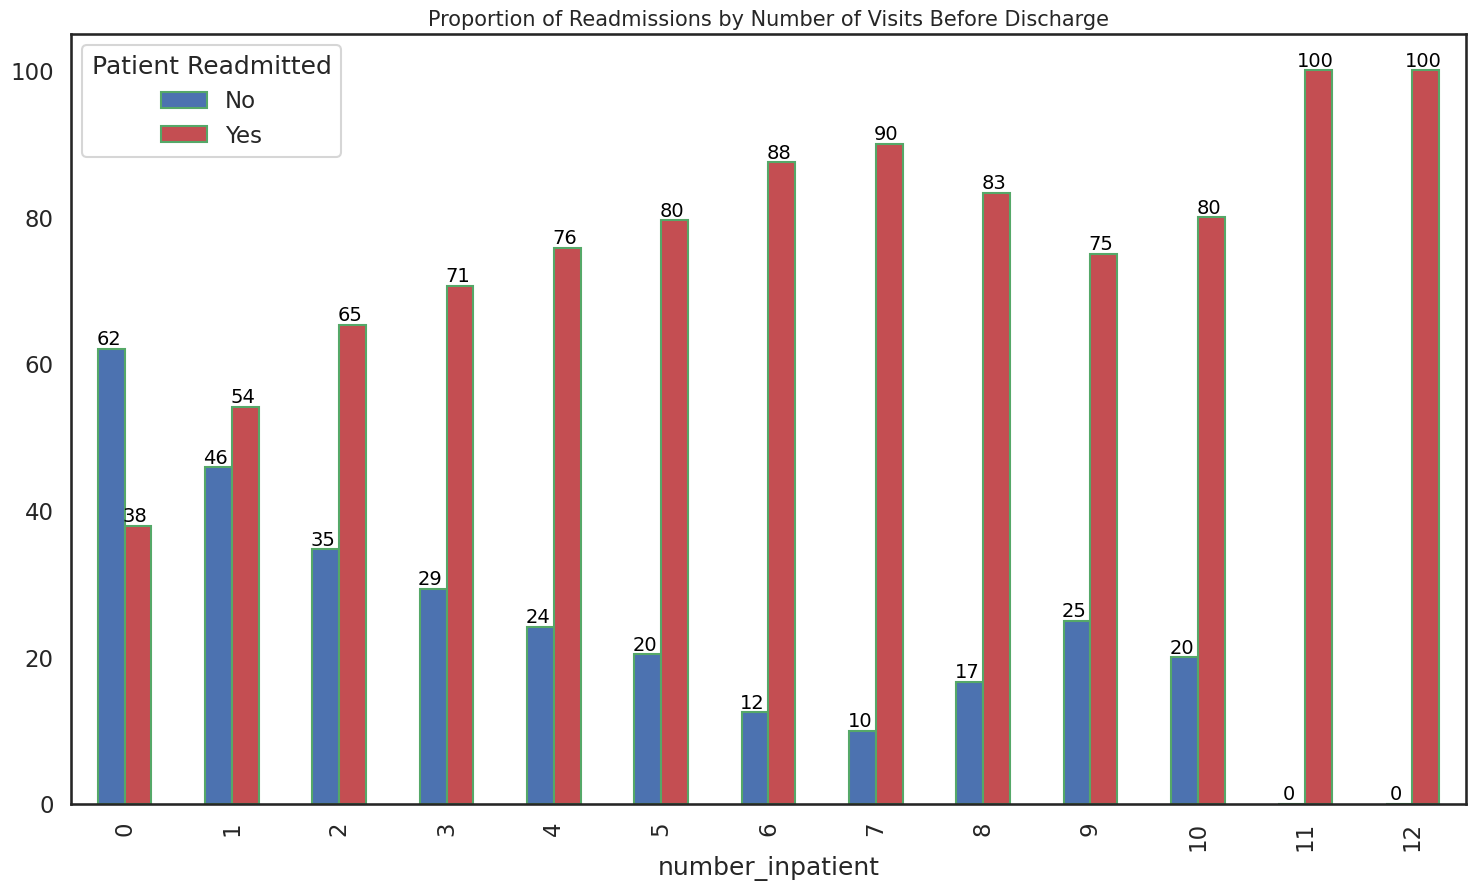

In [23]:
# 22. Pandas Bar Chart from Contingency Table

# Create the bar chart
fig = percent_visits_readm.plot(kind='bar',
                                figsize=(18,10),
                                width=0.5,
                                edgecolor='g',
                                color=['b','r'])

# Adding total values as labels on each bar
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.1, p.get_height()),
                 ha='center',
                 va='bottom',
                 fontsize=14,
                 color='black')

# Title
plt.title("Proportion of Readmissions by Number of Visits Before Discharge", fontsize=15)

# Legend
fig.legend(title='Patient Readmitted', labels=('No', 'Yes'))

# Displaying the chart
plt.show()

> The more visits the patient received before discharge, the higher the volume of readmissions. In other words, the more visits a patient receives, the greater the chances of readmission.

#### **9- What is the Frequency of the Number of Medications Consumed?**

<Axes: xlabel='Number of Medications Consumed', ylabel='Density'>

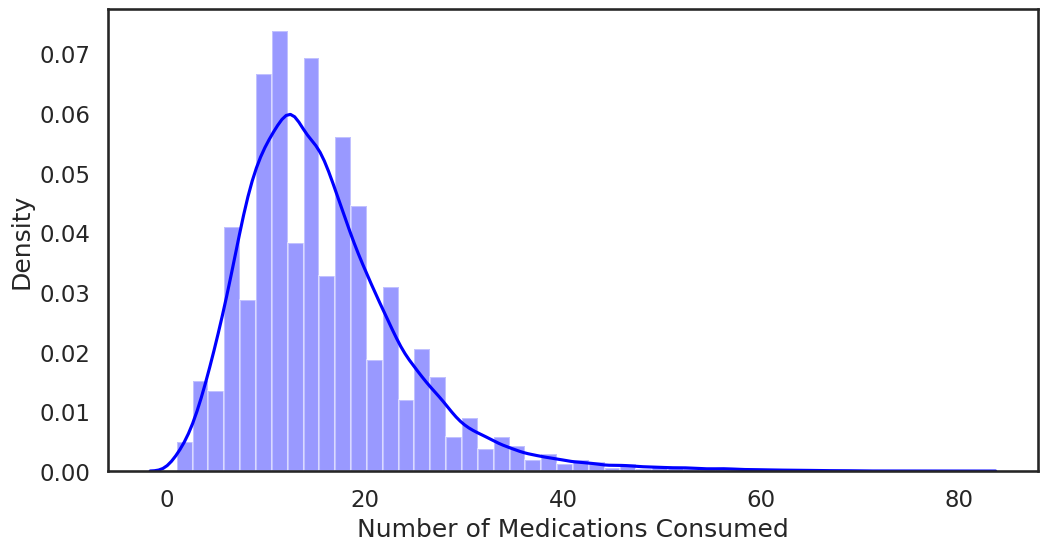

In [24]:
# 23. Histogram (Dist Plot)

# Figure size
plt.figure(figsize=(12,6))

# Create the plot
sns.distplot(data['num_medications'],
             hist=True,
             color='Blue',
             axlabel="Number of Medications Consumed")

> Most patients consumed between 5 and 20 medications.

#### **Stacked Histograms**

<Axes: ylabel='Frequency'>

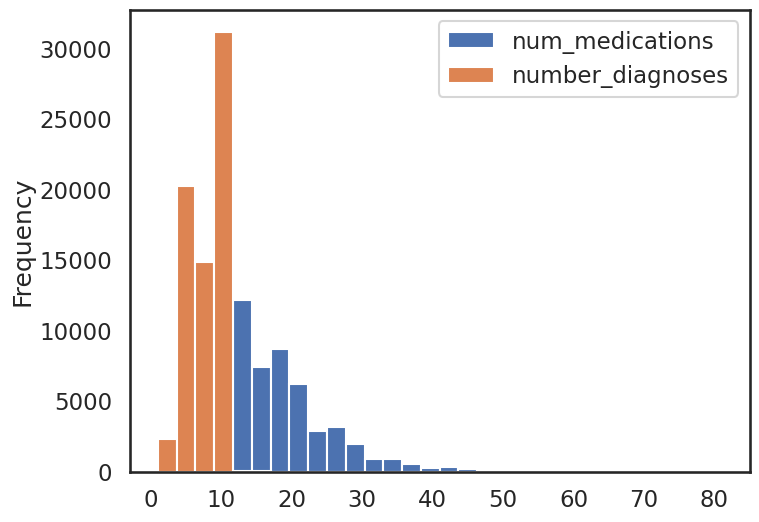

In [25]:
# 24. Two histograms for two variables in the same plot (avoid using this!)
data[["num_medications", "number_diagnoses"]].plot(bins=30, kind="hist", figsize=(8,6))

#### **Histograms of the Same Variable by Different Classes**

array([<Axes: title={'center': 'Not Readmitted'}>,
       <Axes: title={'center': 'Readmitted'}>], dtype=object)

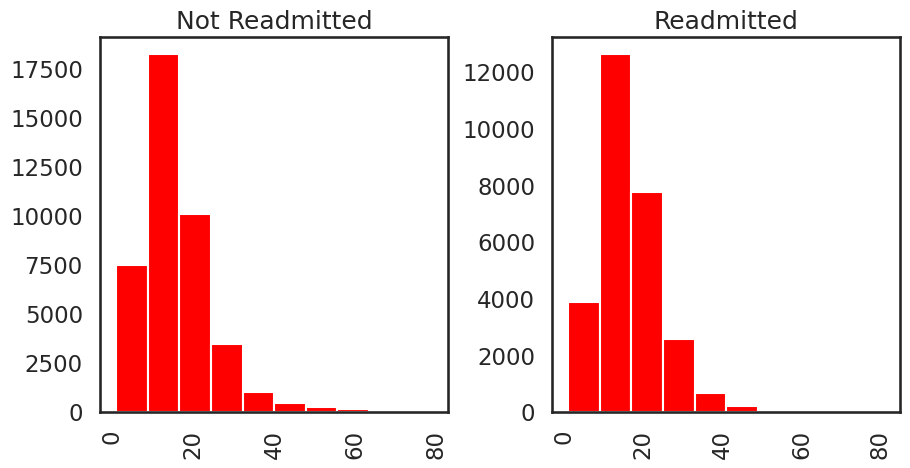

In [26]:
# 25. This can be a good option
data[["num_medications"]].hist(by=data.readmitted, figsize=(10,5), color='Red')

#### **10- Patient Behavior by Clinical Procedures**


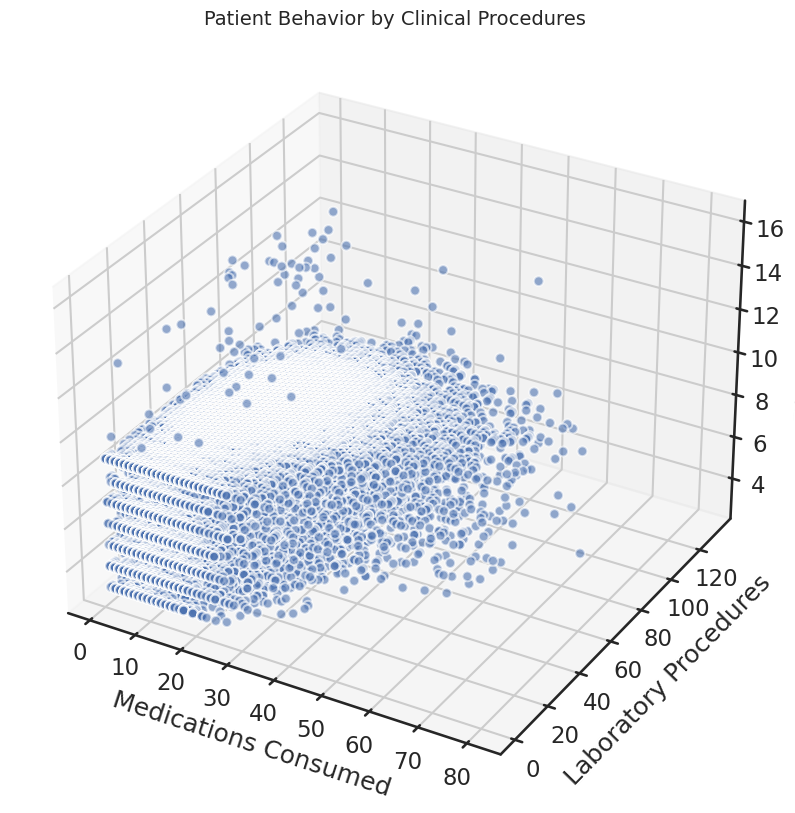

In [27]:
# 26. 3D Projection (AVOID THIS!!!!!)

# Figure size
fig = plt.figure(figsize=(14, 10))

# Subplots
ax = fig.add_subplot(111, projection='3d')

# Dimensions
xs = data['num_medications']
ys = data['num_lab_procedures']
zs = data['number_diagnoses']

# Scatter plot
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# Labels
ax.set_xlabel('\nMedications Consumed')
ax.set_ylabel('\nLaboratory Procedures')
ax.set_zlabel('\nDiagnoses')

# Title
plt.title("Patient Behavior by Clinical Procedures", fontsize=14)

# Displaying the chart
plt.show()

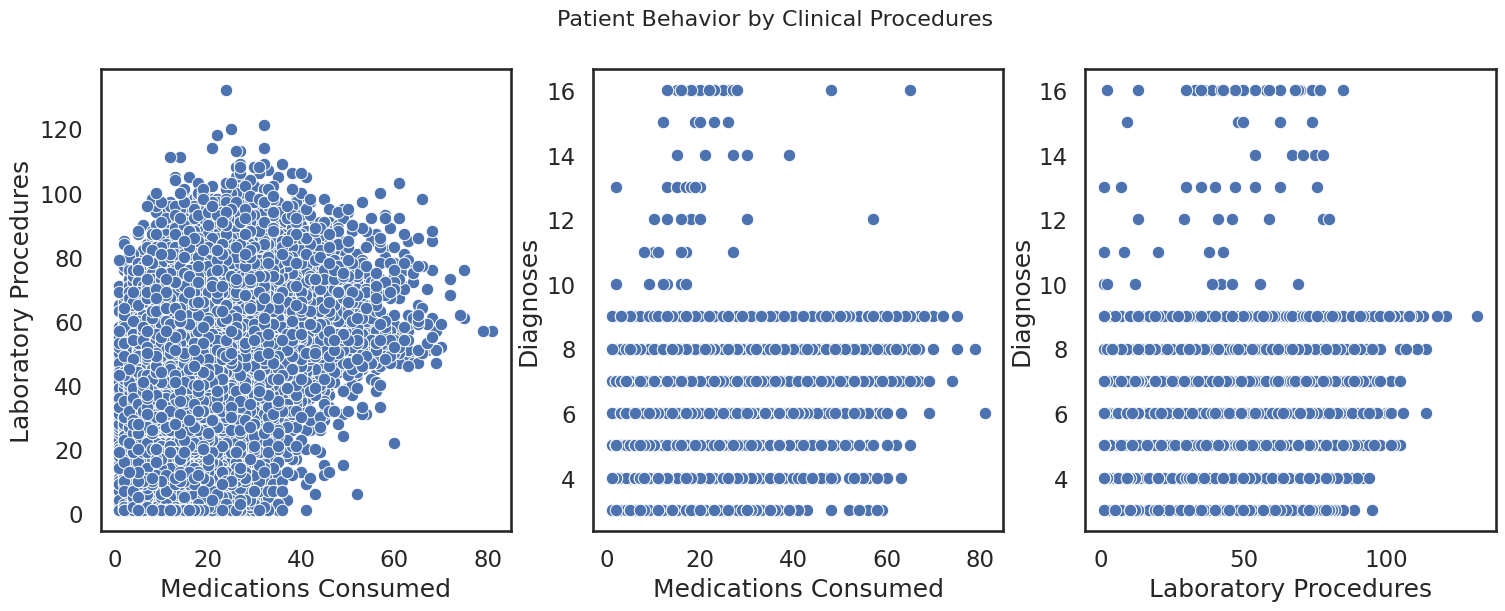

In [28]:
# 27. 2D Plot (USE THIS!!!!)

# Creating 2D plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot of Medications Consumed vs. Laboratory Procedures
sns.scatterplot(x=data['num_medications'], y=data['num_lab_procedures'], data=data, ax=axs[0])
axs[0].set_xlabel('Medications Consumed')
axs[0].set_ylabel('Laboratory Procedures')

# Plot of Medications Consumed vs. Diagnoses
sns.scatterplot(x=data['num_medications'], y=data['number_diagnoses'], data=data, ax=axs[1])
axs[1].set_xlabel('Medications Consumed')
axs[1].set_ylabel('Diagnoses')

# Plot of Laboratory Procedures vs. Diagnoses
sns.scatterplot(x=data['num_lab_procedures'], y=data['number_diagnoses'], data=data, ax=axs[2])
axs[2].set_xlabel('Laboratory Procedures')
axs[2].set_ylabel('Diagnoses')

# Title
plt.suptitle("Patient Behavior by Clinical Procedures", fontsize=16)

# Displaying the plots
plt.show()

> There is a positive relationship between laboratory procedures and medications consumed.

In [29]:
%watermark -a "panData"

Author: panData



In [30]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [31]:
%watermark --iversions

seaborn   : 0.13.2
matplotlib: 3.8.0
pandas    : 2.2.2
numpy     : 1.26.4



# **The End**